# Set Up

### Import necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Import data

In [2]:
relative_path = "Data/clean_us_monthly_retail_sales_1992_to_2022.csv"
df = pd.read_csv(relative_path)
df.head()

,Kind of Business,Date,Sales
0,"Retail and food services sales, total",2022-01-01,583761
1,Retail sales and food services excl motor vehi...,2022-01-01,469700
2,Retail sales and food services excl gasoline s...,2022-01-01,536142
3,Retail sales and food services excl motor vehi...,2022-01-01,422081
4,"Retail sales, total",2022-01-01,516923


In [3]:
df.describe()

,Kind of Business,Date,Sales
count,24180,24180,24180
unique,65,372,16731
top,"Retail and food services sales, total",2022-01-01,(NA)
freq,372,65,492


In [4]:
df.dtypes

Kind of Business    object
Date                object
Sales               object
dtype: object

In [5]:
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Kind of Business            object
Date                datetime64[ns]
Sales                       object
dtype: object

In [6]:
df["Sales"] = pd.to_numeric(df["Sales"],errors="coerce")
df.dtypes

Kind of Business            object
Date                datetime64[ns]
Sales                      float64
dtype: object

In [7]:
df.dropna(subset=['Sales'], inplace=True)
df.describe()

,Date,Sales
count,23427,23427.000000
mean,2007-07-17 18:32:59.562043648,44574.681265
min,1992-01-01 00:00:00,11.000000
25%,2000-01-16 12:00:00,2611.000000
50%,2007-08-01 00:00:00,9237.000000
75%,2015-02-01 00:00:00,36925.500000
max,2022-12-01 00:00:00,741521.000000
std,NaN,92410.746793


# Analysis

## Trends

### Simple Trend

#### Trends on total retail and food services sales in the US

On the x-axis, we have months. On the y-axis, we have total monthly retail and food services sales in the US in millions of US dolars.

In [8]:
retail_food_service = df.loc[df["Kind of Business"]=="Retail and food services sales, total"]
retail_food_service.set_index('Date', inplace=True)
retail_food_service.head()

,Kind of Business,Sales
Date,,
2022-01-01,"Retail and food services sales, total",583761.0
2022-02-01,"Retail and food services sales, total",577319.0
2022-03-01,"Retail and food services sales, total",679465.0
2022-04-01,"Retail and food services sales, total",679473.0
2022-05-01,"Retail and food services sales, total",702760.0


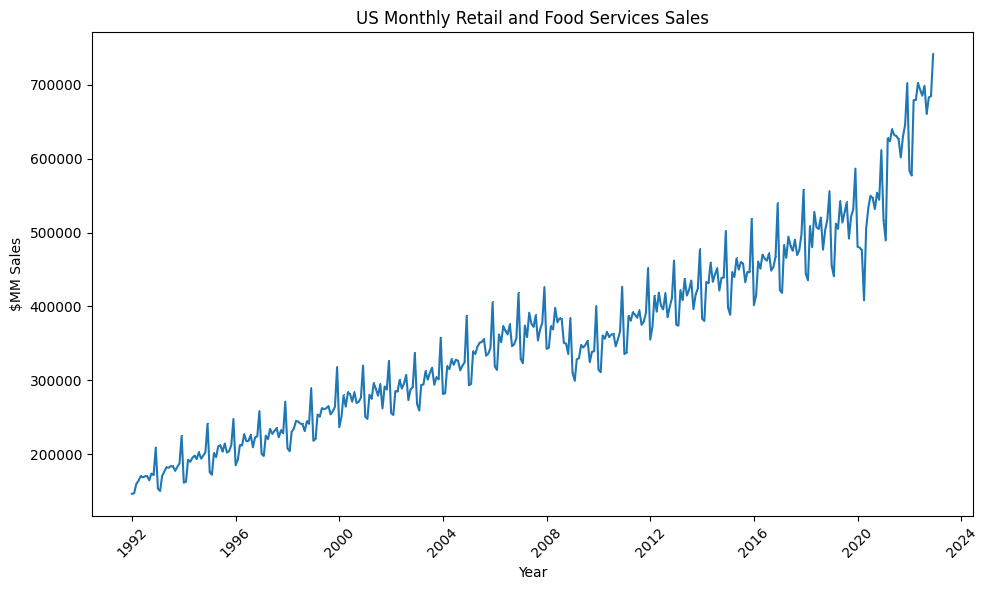

In [9]:
# Sort values 
retail_food_service = retail_food_service.sort_values(by = "Date")

# Plot the time series
plt.figure(figsize=(10, 6)) 
plt.plot(retail_food_service.index, retail_food_service['Sales'], marker=',', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('$MM Sales')
plt.title('US Monthly Retail and Food Services Sales')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [26]:
year_agg_retail = retail_food_service["Sales"].resample("A").sum()
year_agg_retail.head()

Date
1992-12-31    2014102.0
1993-12-31    2153095.0
1994-12-31    2330235.0
1995-12-31    2450628.0
1996-12-31    2603794.0
Freq: A-DEC, Name: Sales, dtype: float64

In [17]:
year_agg_retail.dropna(inplace=True)

In [27]:
year_agg_retail.index

DatetimeIndex(['1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', freq='A-DEC')

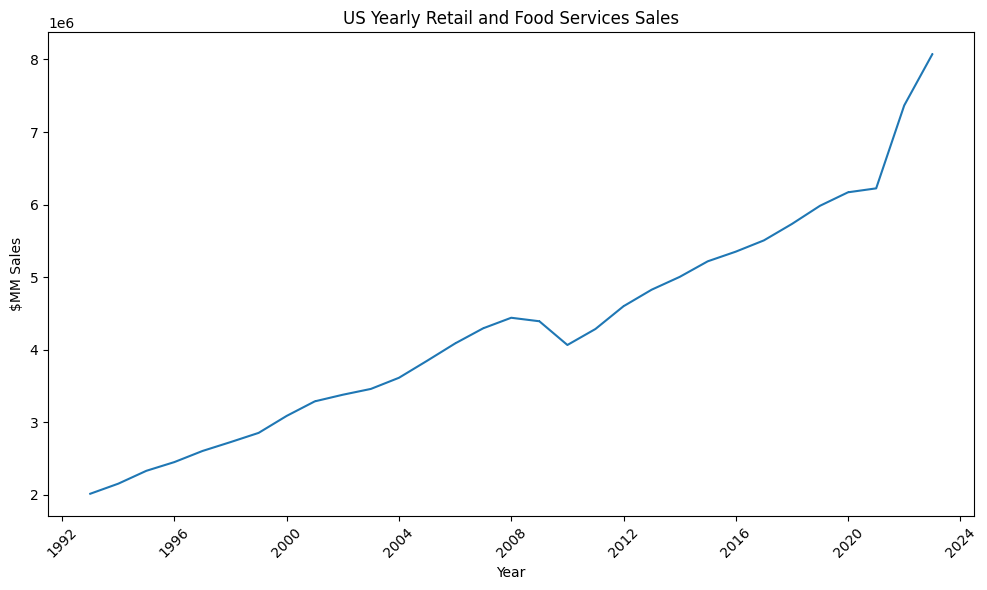

In [32]:
# Plot the time series
plt.figure(figsize=(10, 6)) 
plt.plot(year_agg_retail.index, year_agg_retail, marker=',', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('$MM Sales')
plt.title('US Yearly Retail and Food Services Sales')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### Trend Comparisons In Depth Look

Let's focus on leisure activities. Three types of retail sales that are commonly connected with leisure activities are: book stores, sporting goods stores, and hobby stores.

In [36]:
target_categories = ["Book stores","Sporting goods stores", "Hobby, toy, and game stores"]
leisure_activities = df[df["Kind of Business"].isin(target_categories)]
leisure_activities.describe()

,Date,Sales
count,1116,1116.000000
mean,2007-06-16 20:15:29.032258048,1774.757168
min,1992-01-01 00:00:00,171.000000
25%,1999-09-23 12:00:00,1004.750000
50%,2007-06-16 00:00:00,1250.000000
75%,2015-03-08 18:00:00,2238.000000
max,2022-12-01 00:00:00,7407.000000
std,NaN,1183.046837


In [38]:
# Set index to dates
leisure_activities.set_index('Date', inplace=True)

# Sort values 
leisure_activities = leisure_activities.sort_values(by = "Date")

# Group data by "Kind of Business"
grouped_leisure_activities = leisure_activities.groupby('Kind of Business')


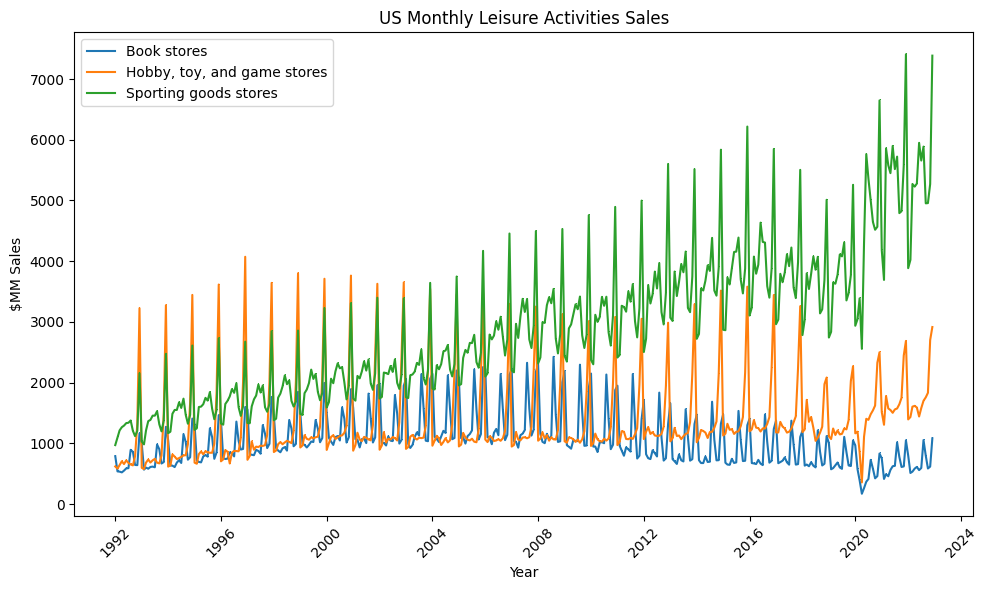

In [40]:

# Plot the time series
plt.figure(figsize=(10, 6)) 

for name, group in grouped_leisure_activities:
    plt.plot(group.index, group['Sales'], marker=',', linestyle='-', label=name)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('$MM Sales')
plt.title('US Monthly Leisure Activities Sales')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [53]:
# Group data by "Kind of Business" and Aggregate yearly
grouped_leisure_activities = leisure_activities.groupby(['Kind of Business', pd.Grouper(freq='A')]).sum()
# Reset index to convert "Kind of Business" back to a column
grouped_leisure_activities.reset_index(inplace=True)


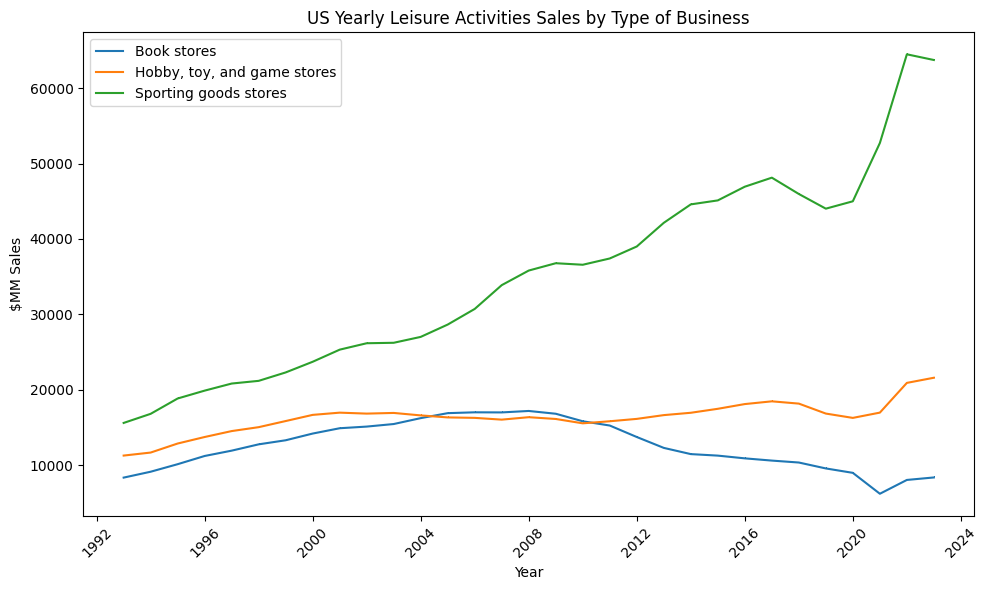

In [54]:

# Plot the time series
plt.figure(figsize=(10, 6)) 

for name, group in grouped_leisure_activities.groupby('Kind of Business'):
    plt.plot(group['Date'], group['Sales'], marker=',', linestyle='-', label=name)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('$MM Sales')
plt.title('US Yearly Leisure Activities Sales by Type of Business')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

The analysis of the annual time series graph depicting US leisure activities sales categorized by business type reveals several key trends. Notably, the data illustrates a rapid growth in sales for sporting goods, surpassing the growth rates of games and books. While the trajectory of sporting goods sales did experience a decline initially, a substantial surge was observed in 2020. This upswing can be attributed to the widespread adoption of outdoor pursuits during the COVID-19 pandemic.

Conversely, sales within the hobby, toy, and game store sector exhibited a comparatively sluggish growth pattern. In contrast to the robust expansion witnessed in sporting goods, the sales of these items advanced at a more moderate pace over the analyzed period.

Regrettably, the sales figures for bookstores portray a disheartening decline. This decline in book sales is particularly lamentable for individuals, like myself, who hold a passion for books.